In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 10000, 3
lr = 0.01
epochs=500
b_size = 32

t_W = np.random.uniform(-1,1,(n_feature,1))
t_b = np.random.uniform(-1,1,(1,1))
W = np.random.uniform(-1,1,(n_feature,1))
b = np.random.uniform(-1,1,(1,1))

n_batch = N // b_size

# generate dataset
x_data = np.random.normal(0,1,(N, n_feature))
y_data = x_data @ t_W + t_b
y_data = (y_data > 0).astype(np.int)

# training
J_track = list()
acc_track = list()
for epoch in range(epochs):
    for b_idx in range(n_batch):
        # get minibatches
        X = x_data[b_idx*b_size : (b_idx+1)*b_size, ...]
        Y = y_data[b_idx*b_size : (b_idx+1)*b_size, ...]

        # forward propagation
        Z = X @ W + b
        Pred = 1/(1+np.exp(-Z))
        J0 = -(Y*np.log(Pred) + (1-Y)*np.log(1-Pred))
        J = np.mean(J0)
        J_track.append(J)

        # calculate accuracy
        Pred_ = (Pred > .5).astype(np.int) # decision boundary
        n_correct = np.sum((Pred_ == Y).astype(np.int))
        acc = n_correct/b_size
        acc_track.append(acc)

        # jacobians
        dJ_dJ0 = 1/N*np.ones((1,b_size))
        dJ0_dPred = np.diag(((Pred - Y)/(Pred*(1-Pred))).flatten())
        dPred_dZ = np.diag(((Pred*(1-Pred))).flatten())
        dZ_dW = X
        dZ_db = np.ones((b_size, 1))
        
        # backpropagation
        dJ_dPred = dJ_dJ0 @ dJ0_dPred
        dJ_dZ = dJ_dPred @ dPred_dZ
        dJ_dW = dJ_dZ @ dZ_dW
        dJ_db = dJ_dZ @ dZ_db

        # paramter update
        W = W - lr*dJ_dW.T
        b = b - lr*dJ_db



<ipython-input-22-b8cbdf49044f>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-22-b8cbdf49044f>:23: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (y_data > 0).astype(np.int)
<ipython-input-22-b8cbdf49044f>:42: DeprecationWarning: `np.int` is a deprecated alias for the 

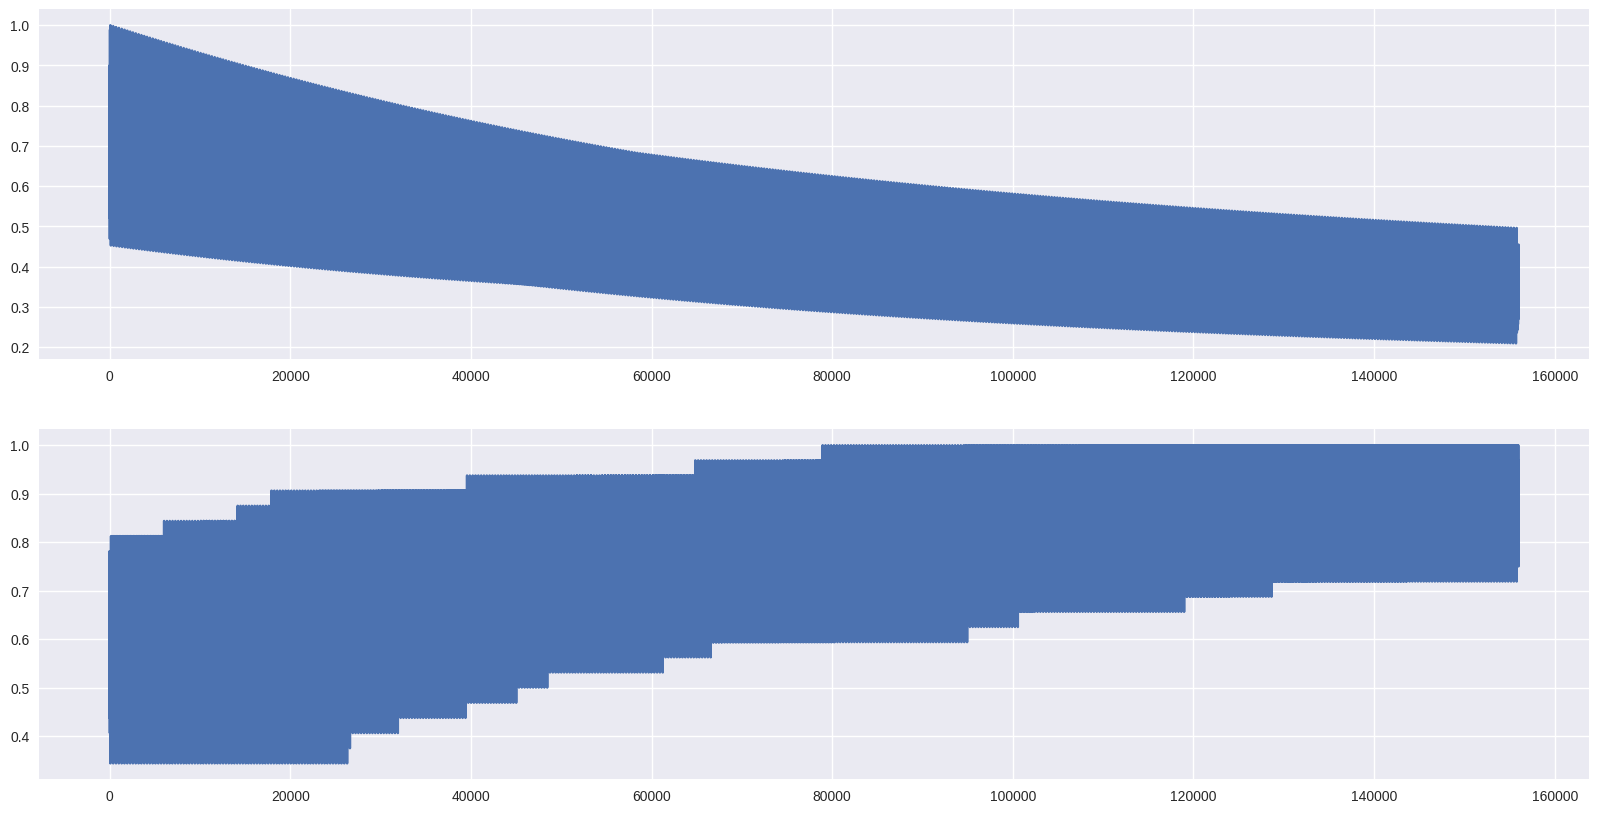

In [23]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(acc_track)